# Generating notebooks
When working on complex tasks, it may make sense to generate an entire notebook for the task. 
Hence, we can ask bob to generate a notebook for a series of tasks.

In [1]:
from skimage.io import imread
import stackview
from bia_bob import bob

In [2]:
%%bob 
Please write a new notebook "Blob_Segmentation_Analysis.ipynb" that does the following:
* open blobs.tif, 
* segment the bright objects
* measure their area and perimeter
* plot the area against perimeter

A notebook has been saved as [Blob_Segmentation_Analysis.ipynb](Blob_Segmentation_Analysis.ipynb).

## Generating a notebook using vision capabilities
The model we're using per default has vision capabilities. Thus, we can pass an image to `bob` and ask it to create a notebook for segmenting it:

StackViewNDArray([[[ 3,  6,  1],
                   [ 3,  7,  0],
                   [ 3,  6,  1],
                   ...,
                   [11,  8,  2],
                   [11,  7,  2],
                   [11, 11,  2]],

                  [[ 3,  6,  1],
                   [ 3,  8,  1],
                   [ 3,  7,  1],
                   ...,
                   [11, 10,  2],
                   [10, 10,  2],
                   [11, 11,  2]],

                  [[ 4,  6,  1],
                   [ 3,  6,  1],
                   [ 4,  6,  1],
                   ...,
                   [10, 10,  2],
                   [11, 10,  2],
                   [11, 10,  2]],

                  ...,

                  [[15, 14,  8],
                   [14, 14,  8],
                   [15, 14,  7],
                   ...,
                   [10, 11,  5],
                   [10, 12,  4],
                   [11, 14,  5]],

                  [[14, 16,  7],
                   [16, 15,  7],
                   [15, 16,  8],
                   ...,
                   [10, 11,  4],
                   [11, 13,  4],
                   [11, 16,  5]],

                  [[15, 18,  7],
                   [14, 17,  8],
                   [14, 17,  8],
                   ...,
                   [ 9, 12,  5],
                   [10, 13,  5],
                   [11, 15,  5]]], dtype=uint8)
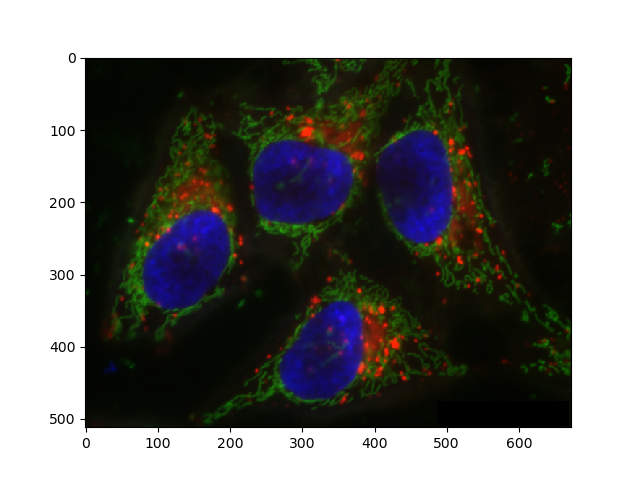
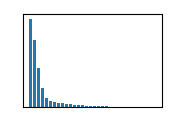

In [3]:
hela_cells = imread("hela-cells-8bit.tif")
stackview.insight(hela_cells)

In [4]:
%%bob hela_cells
Please write a new Jupyter notebook for processing this image. 
Its filename is `hela-cells-8bit.tif`.
At the beginning of the notebook describe the image it is made for.
I would like to segment the objects in the blue channel.
Write Python-code for doing this and please add explanatory notebook 
cellls in between explaining what you're doing in detail as I'm a 
Python-beginner. 

Thanks :-)

A notebook has been saved as [segmenting_objects_in_hela_cells.ipynb](segmenting_objects_in_hela_cells.ipynb).

## Generating no notebook
Note, if we don't ask for the notebook explicitly, Bob will write a huge code block, which might be less readable.

In [5]:
%%bob 
Please do the following:
* open blobs.tif, 
* segment the bright objects
* measure their area and perimeter
* plot the area against perimeter

We will perform image segmentation on "blobs.tif" to identify and measure the bright objects, compute their area and perimeter, and plot the area against the perimeter.



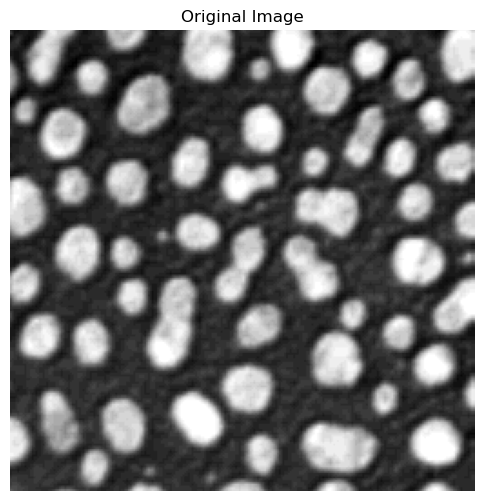

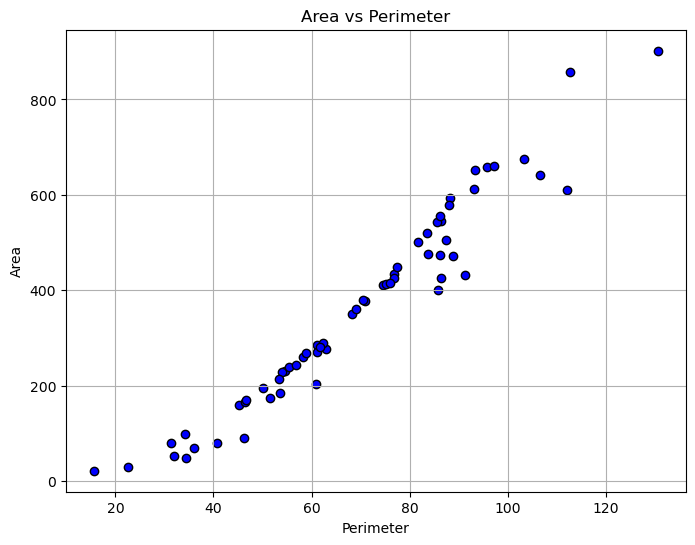

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, measure, morphology, segmentation

# Load the image
image_path = 'blobs.tif'
image = io.imread(image_path)

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Segment the bright objects using Otsu's thresholding
threshold_value = filters.threshold_otsu(image)
binary_image = image > threshold_value

# Remove small objects to denoise
cleaned_binary_image = morphology.remove_small_objects(binary_image, min_size=20)

# Label the connected components
labeled_image, num_features = measure.label(cleaned_binary_image, return_num=True)

# Measure properties of labeled regions
props = measure.regionprops(labeled_image)

# Extract area and perimeter for each region
areas = [prop.area for prop in props]
perimeters = [prop.perimeter for prop in props]

# Plot area against perimeter
plt.figure(figsize=(8, 6))
plt.scatter(perimeters, areas, color='blue', edgecolor='black')
plt.title('Area vs Perimeter')
plt.xlabel('Perimeter')
plt.ylabel('Area')
plt.grid(True)
plt.show()